**CLEANING**

In [18]:
import pandas as pd
df_raw = pd.read_csv(r'C:\Users\kiran\Desktop\os el\csv files\DoS_dataset (1).csv')

print(df_raw.shape)

(3665770, 12)


In [22]:
import pandas as pd


# Step 2: Standardize all rows to 12 columns
def fix_row(row):
    row = list(row.dropna())
    # Always treat the last column as Label
    if len(row) >= 4:
        label = row[-1]
        core = row[:-1]
    else:
        label = 'R'  # fallback label if totally broken row
        core = row

    # Pad to get 11 values before the label (Timestamp, CAN_ID, DLC, data1–8)
    core_padded = core + ['00'] * (11 - len(core))
    return core_padded + [label]

df_fixed = df_raw.apply(fix_row, axis=1, result_type='expand')

# Step 3: Rename columns
df_fixed.columns = ['Timestamp', 'CAN_ID', 'DLC',
                    'data1', 'data2', 'data3', 'data4',
                    'data5', 'data6', 'data7', 'data8',
                    'Label']

# Step 4: Fill missing hex values
hex_cols = ['CAN_ID', 'data1', 'data2', 'data3', 'data4', 'data5', 'data6', 'data7', 'data8']
df_fixed[hex_cols] = df_fixed[hex_cols].fillna('00')

# Step 5: Convert hex to integers with error catching
for col in hex_cols:
    def safe_hex_to_int(x):
        try:
            return int(str(x).strip(), 16)
        except Exception as e:
            print(f"Error in column '{col}': value '{x}' caused error: {e}")
            return 0

    df_fixed[col] = df_fixed[col].apply(safe_hex_to_int)

# Step 6: Convert timestamp to datetime
df_fixed['Datetime'] = pd.to_datetime(df_fixed['Timestamp'], unit='s', errors='coerce')

# Step 7: Convert Label column to binary
label_map = {'T': 1, 'R': 0}
df_fixed['Label'] = df_fixed['Label'].map(label_map).fillna(0).astype(int)

# Final preview
print(df_fixed.head())


      Timestamp  CAN_ID  DLC  data1  data2  data3  data4  data5  data6  data7  \
0  1.478198e+09     399    8    254     91      0      0      0     60      0   
1  1.478198e+09     608    8     25     33     34     48      8    142    109   
2  1.478198e+09     672    8    100      0    154     29    151      2    189   
3  1.478198e+09     809    8     64    187    127     20     17     32      0   
4  1.478198e+09    1349    8    216      0      0    138      0      0      0   

   data8  Label                      Datetime  
0      0      0 2016-11-03 18:39:36.389636040  
1     58      0 2016-11-03 18:39:36.389863968  
2      0      0 2016-11-03 18:39:36.390095949  
3     20      0 2016-11-03 18:39:36.390332937  
4      0      0 2016-11-03 18:39:36.390573978  


In [23]:
#SECONDS SINCE START SET MAADOKE 
df=df_fixed
df['SecondsSinceStart'] = df['Timestamp'] - df['Timestamp'].min()


In [28]:
df.to_csv("clean_DoS.csv", index=False)


In [5]:
df.describe(include='all')

,Timestamp,CAN_ID,DLC,data1,data2,data3,data4,data5,data6,data7,data8,Label,Datetime,SecondsSinceStart
count,7.519400e+04,75194.000000,75194.000000,75194.000000,75194.000000,75194.000000,75194.000000,75194.000000,75194.000000,75194.000000,75194.000000,75194.000000,75194,75194.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75194,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-11-03 18:39:36.389636040,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
mean,1.478198e+09,533.587853,7.956193,45.678791,34.013339,28.249900,48.749023,35.500918,51.847062,19.713767,36.492340,0.241908,NaN,29.414450
std,1.770281e+01,445.247430,0.510808,85.074349,51.334082,51.920307,85.431724,66.104445,76.769882,50.425527,65.006396,0.428241,NaN,17.702807
min,1.478198e+09,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000
25%,1.478198e+09,2.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,13.829539
50%,1.478198e+09,497.000000,8.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,NaN,30.884572
75%,1.478198e+09,848.000000,8.000000,26.000000,35.000000,34.000000,48.000000,34.000000,105.000000,8.000000,40.000000,0.000000,NaN,44.567816


In [24]:
df.tail(10)

,Timestamp,CAN_ID,DLC,data1,data2,data3,data4,data5,data6,data7,data8,Label,Datetime,SecondsSinceStart
3665760,1.478201e+09,305,8,247,127,0,0,83,127,9,13,0,2016-11-03 19:26:49.053147078,2832.663511
3665761,1.478201e+09,320,8,0,0,0,0,22,0,41,101,0,2016-11-03 19:26:49.053388119,2832.663752
3665762,1.478201e+09,848,8,5,32,116,104,117,0,0,76,0,2016-11-03 19:26:49.053622007,2832.663986
3665763,1.478201e+09,1264,8,0,0,0,128,0,105,209,19,0,2016-11-03 19:26:49.056291103,2832.666655
3665764,1.478201e+09,790,8,5,33,48,10,33,30,0,111,0,2016-11-03 19:26:49.057781935,2832.668146
3665765,1.478201e+09,399,8,254,89,0,0,0,65,0,0,0,2016-11-03 19:26:49.058007002,2832.668371
3665766,1.478201e+09,608,8,24,33,33,48,8,143,109,25,0,2016-11-03 19:26:49.058237076,2832.668601
3665767,1.478201e+09,672,8,36,0,154,29,151,2,189,0,0,2016-11-03 19:26:49.058470964,2832.668835
3665768,1.478201e+09,809,8,220,183,127,20,17,32,0,20,0,2016-11-03 19:26:49.058702946,2832.669067
3665769,1.478201e+09,1349,8,216,0,0,139,0,0,0,0,0,2016-11-03 19:26:49.058943987,2832.669308


In [7]:
df.head()

,1478198376.389427,0316,8,05,21,68,09,21.1,21.2,00,6f,R
0,1.478198e+09,018f,8,fe,5b,00,00,00,3c,00,00,R
1,1.478198e+09,0260,8,19,21,22,30,08,8e,6d,3a,R
2,1.478198e+09,02a0,8,64,00,9a,1d,97,02,bd,00,R
3,1.478198e+09,0329,8,40,bb,7f,14,11,20,00,14,R
4,1.478198e+09,0545,8,d8,00,00,8a,00,00,00,00,R


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 75194 entries, 0 to 75193
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Timestamp          75194 non-null  float64
 1   CAN_ID             75194 non-null  int64  
 2   DLC                75194 non-null  int64  
 3   data1              75194 non-null  int64  
 4   data2              75194 non-null  int64  
 5   data3              75194 non-null  int64  
 6   data4              75194 non-null  int64  
 7   data5              75194 non-null  int64  
 8   data6              75194 non-null  int64  
 9   data7              75194 non-null  int64  
 10  data8              75194 non-null  int64  
 11  Label              75194 non-null  int64  
 12  Datetime           75194 non-null  object 
 13  SecondsSinceStart  75194 non-null  float64
dtypes: float64(2), int64(11), object(1)
memory usage: 8.6+ MB


In [12]:
df[['data4', 'data5', 'data6', 'data7', 'data8', 'Label']] = df[['data4', 'data5', 'data6', 'data7', 'data8', 'Label']].fillna(0)


In [13]:
df.isnull().sum()

Timestamp    0
CAN_ID       0
DLC          0
data1        0
data2        0
data3        0
data4        0
data5        0
data6        0
data7        0
data8        0
Label        0
Datetime     0
dtype: int64

ValueError: invalid literal for int() with base 16: 'R'

**LATENCY ANALYSIS**

In [2]:
import re
import csv
from datetime import datetime

# Regex to capture received or DoS CAN messages
msg_pattern = re.compile(
    r'\[(?P<dt>[\d\-]+\s[\d:.]+)\]\s+(?P<type>Received ID|DoS Message sent ID): 0x(?P<canid>[0-9A-Fa-f]+), DLC: (?P<dlc>\d+), Data: (?P<data>(\s?[0-9A-Fa-f]{2}){1,8})'
)

input_file = 'log_input.txt'   # Input log file
output_csv = 'parsed_can_log.csv'  # Output CSV file

rows = []
start_timestamp = None

with open(r"C:\Espressif\frameworks\esp32_twai_can_receiver_sends_data_also\can_log.txt", 'r') as f:
    for line in f:
        match = msg_pattern.search(line)
        if match:
            dt_str = match.group("dt")
            dt_obj = datetime.strptime(dt_str, "%Y-%m-%d %H:%M:%S.%f")
            unix_ts = dt_obj.timestamp()

            if start_timestamp is None:
                start_timestamp = unix_ts

            seconds_since_start = unix_ts - start_timestamp

            can_id = int(match.group("canid"), 16)
            dlc = int(match.group("dlc"))
            data_bytes = match.group("data").strip().split()

            # Pad missing data bytes with 0s
            data_bytes = [int(byte, 16) for byte in data_bytes] + [0] * (8 - len(data_bytes))

            label = "DoS" if "DoS" in match.group("type") else "Normal"

            row = [
                unix_ts, can_id, dlc,
                *data_bytes[:8],  # Ensure exactly 8 data fields
                label,
                dt_obj.isoformat(),
                round(seconds_since_start, 6)
            ]
            rows.append(row)

# Write to CSV
with open(output_csv, 'w', newline='') as f:
    writer = csv.writer(f)
    writer.writerow([
        "Timestamp", "CAN_ID", "DLC",
        "data1", "data2", "data3", "data4", "data5", "data6", "data7", "data8",
        "Label", "Datetime", "SecondsSinceStart"
    ])
    writer.writerows(rows)

print(f"✅ Parsed {len(rows)} CAN messages to '{output_csv}'")


✅ Parsed 2994 CAN messages to 'parsed_can_log.csv'


Suspicious CAN IDs (possible attackers due to low consistent latency):


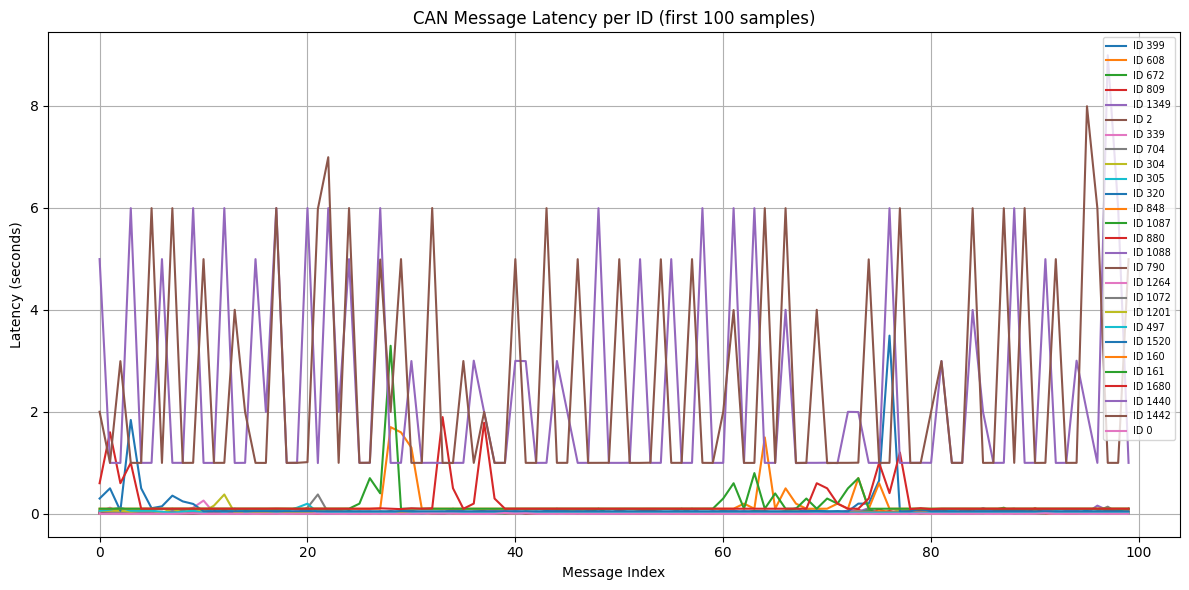

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# === Load CAN log file ===
df = pd.read_csv(r'C:\Users\kiran\Desktop\os el\csv files\clean_DoS.csv')  # Replace with your file name
# === Filter to first 10 minutes (600 seconds) ===
df = df[df['SecondsSinceStart'] <= 600]


# === Calculate latency per CAN ID using SecondsSinceStart ===
latency_results = {}
suspicious_ids = []

for can_id in df['CAN_ID'].unique():
    timestamps = df[df['CAN_ID'] == can_id]['SecondsSinceStart'].values
    if len(timestamps) > 1:
        latencies = [t2 - t1 for t1, t2 in zip(timestamps[:-1], timestamps[1:])]
        latency_results[can_id] = latencies
        # Flag as suspicious if all latencies are consistently ≤ 0.007 seconds (7 ms)
        if all(lat <= 0.007 for lat in latencies):
            suspicious_ids.append(can_id)

# === Display suspicious IDs ===
print("Suspicious CAN IDs (possible attackers due to low consistent latency):")
for sid in suspicious_ids:
    mean_latency = sum(latency_results[sid]) / len(latency_results[sid])
    print(f"{sid} with mean latency = {mean_latency:.6f} seconds")

# === Optional: Plot latency for each ID (first 100 latencies) ===
plt.figure(figsize=(12, 6))
for can_id, latencies in latency_results.items():
    plt.plot(latencies[100:200], label=f'ID {can_id}')
plt.xlabel('Message Index')
plt.ylabel('Latency (seconds)')
plt.title('CAN Message Latency per ID (first 100 samples)')
plt.legend(loc='upper right', fontsize='x-small')
plt.grid(True)
plt.tight_layout()
plt.show()


In [36]:
(df['CAN_ID'].head(2700) == 0).value_counts()


CAN_ID
False    2056
True      644
Name: count, dtype: int64

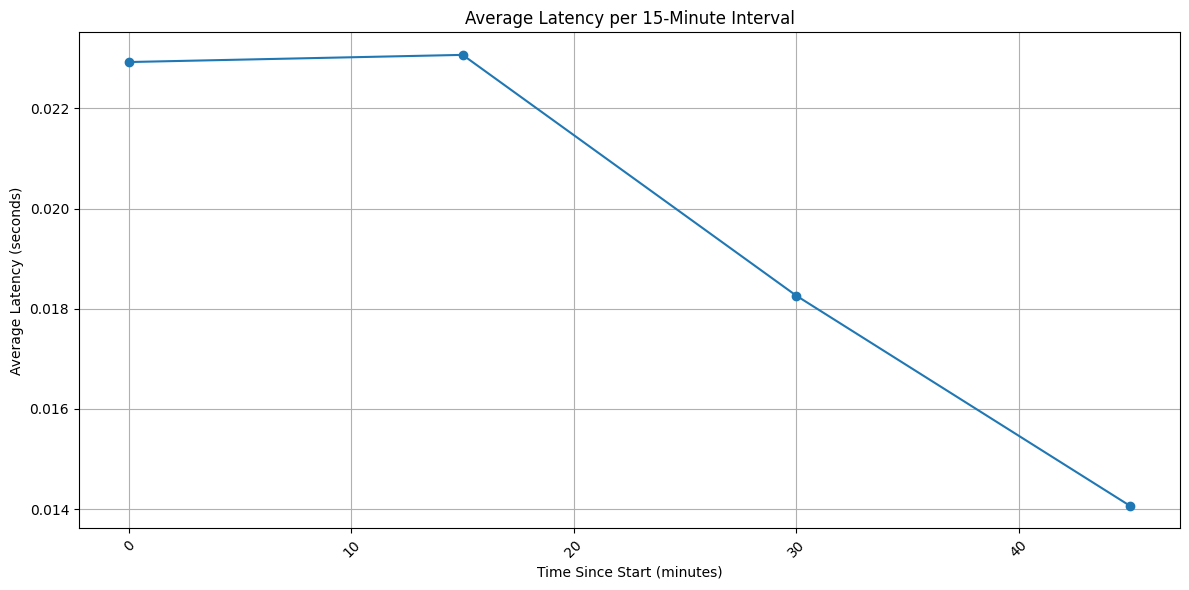

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# === Load the cleaned dataframe ===
df = pd.read_csv(r'C:\Users\kiran\Desktop\os el\csv files\clean_DoS.csv')  # Make sure it includes 'Datetime' and 'CAN_ID'


# === Calculate latency for each CAN_ID ===
df['PrevTime'] = df.groupby('CAN_ID')['SecondsSinceStart'].shift(1)
df['Latency'] = df['SecondsSinceStart'] - df['PrevTime']

# Drop rows where latency is NaN (first messages per CAN ID)
df = df.dropna(subset=['Latency'])

# === Define time bins ===
df['TimeBin'] = (df['SecondsSinceStart'] // (15 * 60)).astype(int)  # 15-minute bins

# === Compute average latency per bin (optionally by CAN_ID) ===
avg_latency_per_bin = df.groupby('TimeBin')['Latency'].mean()

# avg_latency_per_bin = df.groupby(['TimeBin', 'CAN_ID'])['Latency'].mean()


# === Plotting ===
plt.figure(figsize=(12, 6))
plt.plot(avg_latency_per_bin.index * 15, avg_latency_per_bin.values, marker='o')
plt.title("Average Latency per 15-Minute Interval")
plt.xlabel("Time Since Start (minutes)")
plt.ylabel("Average Latency (seconds)")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**FREQUENCY**

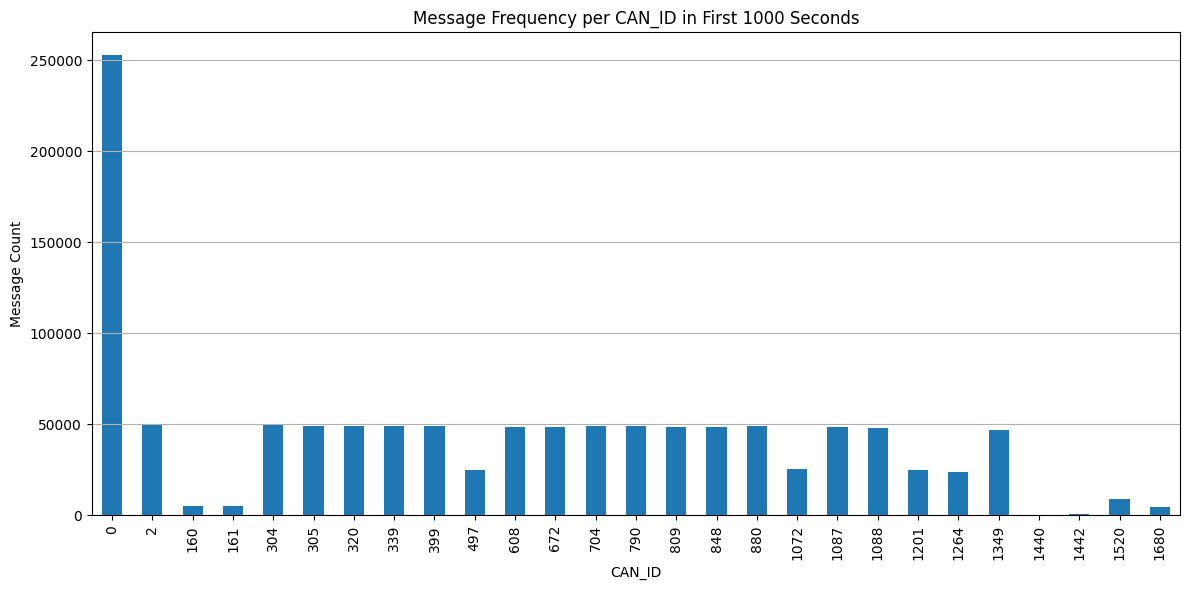

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# === Load dataset ===
df = pd.read_csv(r'C:\Users\kiran\Desktop\os el\csv files\clean_DoS.csv')

# === Define time limit in seconds ===
time_limit = 1000  # change this to your desired time window

# === Filter dataset for messages within the time limit ===
df_filtered = df[df['SecondsSinceStart'] <= time_limit]

# === Calculate frequency (message count) per CAN_ID ===
frequency = df_filtered['CAN_ID'].value_counts().sort_index()

# === Plot frequency ===
plt.figure(figsize=(12, 6))
frequency.plot(kind='bar')
plt.title(f'Message Frequency per CAN_ID in First {time_limit} Seconds')
plt.xlabel('CAN_ID')
plt.ylabel('Message Count')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


**paramets in this range**

In [11]:
df = pd.read_csv(r'C:\Users\kiran\Desktop\os el\csv files\clean_DoS.csv')
df = df[(df['SecondsSinceStart'] >= 0) & (df['SecondsSinceStart'] < 600)].copy()

**1. InterArrival Time (per CAN ID)**

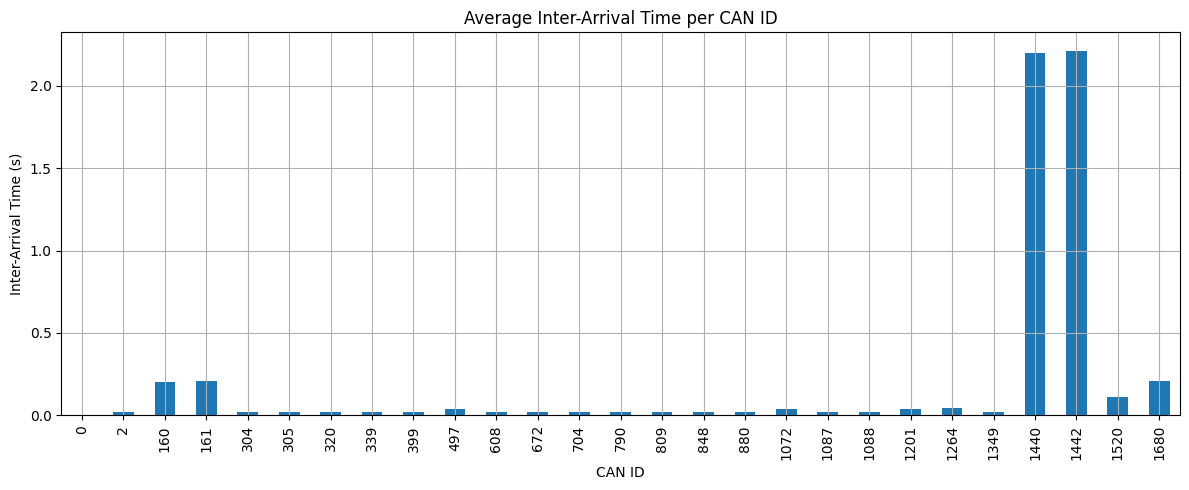

In [12]:
import pandas as pd
import matplotlib.pyplot as plt


# === Calculate InterArrival ===
df['PrevTime'] = df.groupby('CAN_ID')['SecondsSinceStart'].shift(1)
df['InterArrival'] = df['SecondsSinceStart'] - df['PrevTime']
df.dropna(subset=['InterArrival'], inplace=True)

# === Plot average InterArrival per CAN ID ===
avg_interarrival = df.groupby('CAN_ID')['InterArrival'].mean()
avg_interarrival.plot(kind='bar', figsize=(12, 5), title='Average Inter-Arrival Time per CAN ID')
plt.xlabel('CAN ID')
plt.ylabel('Inter-Arrival Time (s)')
plt.grid(True)
plt.tight_layout()
plt.show()


**Payload Entropy**

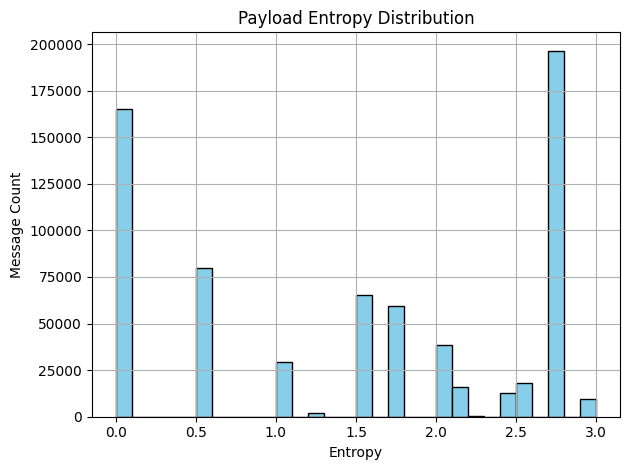

In [13]:
import numpy as np
import math

# === Create Payload and Entropy column ===
payload_cols = [f'data{i}' for i in range(1, 9)]
df['Payload'] = df[payload_cols].values.tolist()

def calculate_entropy(payload):
    counts = np.bincount(payload, minlength=256)
    probs = counts / len(payload)
    probs = probs[probs > 0]
    return -np.sum(probs * np.log2(probs))

df['PayloadEntropy'] = df['Payload'].apply(calculate_entropy)

# === Plot entropy distribution ===
plt.hist(df['PayloadEntropy'], bins=30, color='skyblue', edgecolor='black')
plt.title('Payload Entropy Distribution')
plt.xlabel('Entropy')
plt.ylabel('Message Count')
plt.grid(True)
plt.tight_layout()
plt.show()


Flag high entropy messages as potential fuzzing or replay

Flag low entropy messages, especially if repeated frequently, as DoS/spoofing

Track entropy per CAN_ID over time to detect behavioral anomalies



**3. Bit Flips**

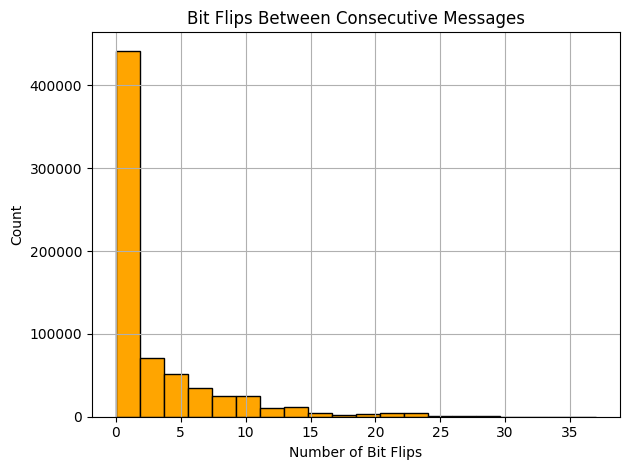

In [14]:
df['BitFlips'] = 0
last_payload = {}

for i, row in df.iterrows():
    can_id = row['CAN_ID']
    payload = row['Payload']
    if can_id in last_payload:
        prev = last_payload[can_id]
        flips = sum(bin(b1 ^ b2).count('1') for b1, b2 in zip(prev, payload))
        df.at[i, 'BitFlips'] = flips
    last_payload[can_id] = payload

# === Plot bit flip histogram ===
plt.hist(df['BitFlips'], bins=20, color='orange', edgecolor='black')
plt.title('Bit Flips Between Consecutive Messages')
plt.xlabel('Number of Bit Flips')
plt.ylabel('Count')
plt.grid(True)
plt.tight_layout()
plt.show()


**4. Zero Payload Ratio**

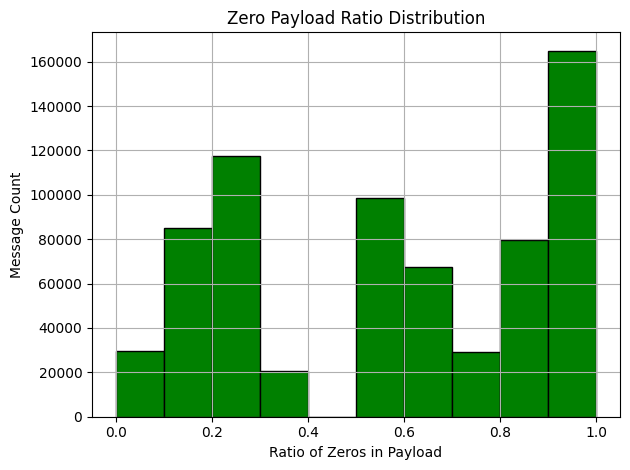

In [16]:
df['ZeroPayloadRatio'] = df['Payload'].apply(lambda x: x.count(0) / len(x))

# === Plot zero-payload ratio ===
plt.hist(df['ZeroPayloadRatio'], bins=10, color='green', edgecolor='black')
plt.title('Zero Payload Ratio Distribution')
plt.xlabel('Ratio of Zeros in Payload')
plt.ylabel('Message Count')
plt.grid(True)
plt.tight_layout()
plt.show()


**5. Repetitive Bytes**

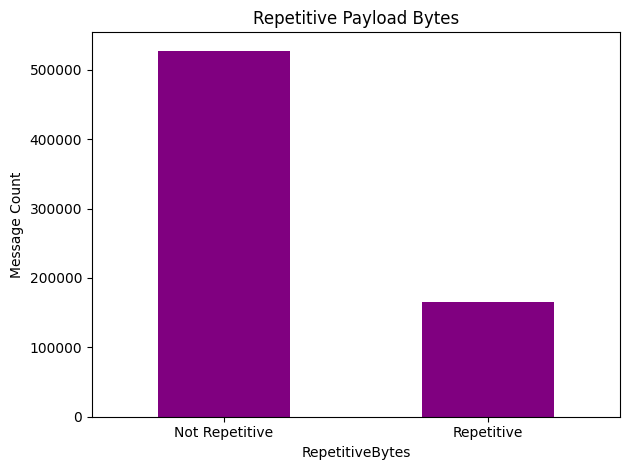

In [17]:
df['RepetitiveBytes'] = df['Payload'].apply(lambda x: all(b == x[0] for b in x))

# === Plot repetitive byte counts ===
counts = df['RepetitiveBytes'].value_counts()
counts.plot(kind='bar', color='purple')
plt.xticks([0, 1], ['Not Repetitive', 'Repetitive'], rotation=0)
plt.title('Repetitive Payload Bytes')
plt.ylabel('Message Count')
plt.tight_layout()
plt.show()


**6. IsDuplicate (last 10 messages)**

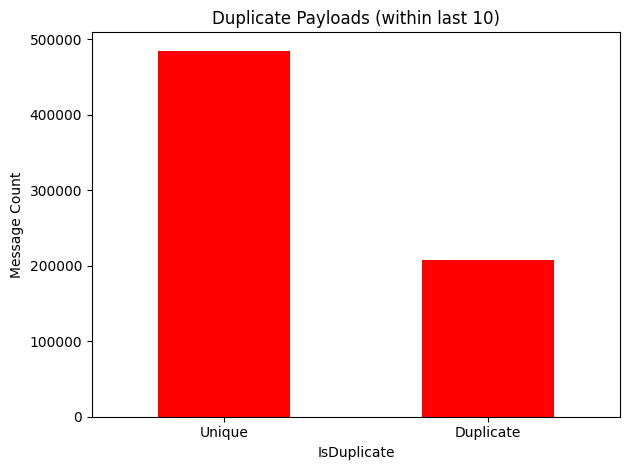

In [18]:
from collections import deque

df['IsDuplicate'] = False
payload_history = {}

for i, row in df.iterrows():
    can_id = row['CAN_ID']
    payload = row['Payload']
    if can_id not in payload_history:
        payload_history[can_id] = deque(maxlen=10)
    if payload in payload_history[can_id]:
        df.at[i, 'IsDuplicate'] = True
    payload_history[can_id].append(payload)

# === Plot duplicates ===
df['IsDuplicate'].value_counts().plot(kind='bar', color='red')
plt.xticks([0, 1], ['Unique', 'Duplicate'], rotation=0)
plt.title('Duplicate Payloads (within last 10)')
plt.ylabel('Message Count')
plt.tight_layout()
plt.show()


**7. Frequency Per Second (per CAN ID)**

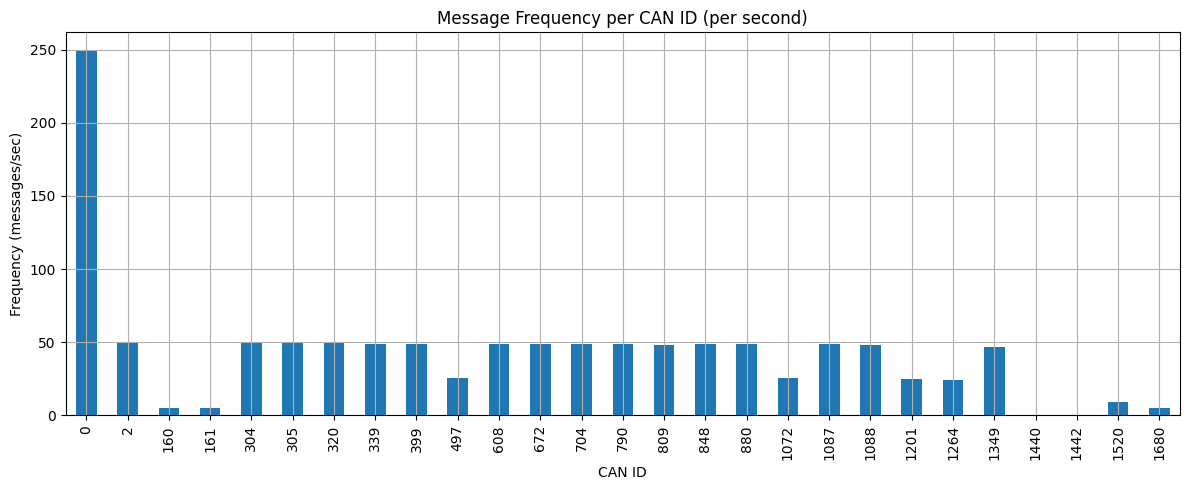

In [19]:
message_count = {}

for can_id, group in df.groupby('CAN_ID'):
    timestamps = group['SecondsSinceStart'].values
    duration = max(timestamps) - min(timestamps)
    freq = len(timestamps) / duration if duration > 0 else 0
    message_count[can_id] = freq

# === Plot frequency per CAN ID ===
freq_series = pd.Series(message_count).sort_index()
freq_series.plot(kind='bar', figsize=(12, 5), title='Message Frequency per CAN ID (per second)')
plt.xlabel('CAN ID')
plt.ylabel('Frequency (messages/sec)')
plt.grid(True)
plt.tight_layout()
plt.show()


**8. CAN_ID-wise Entropy**

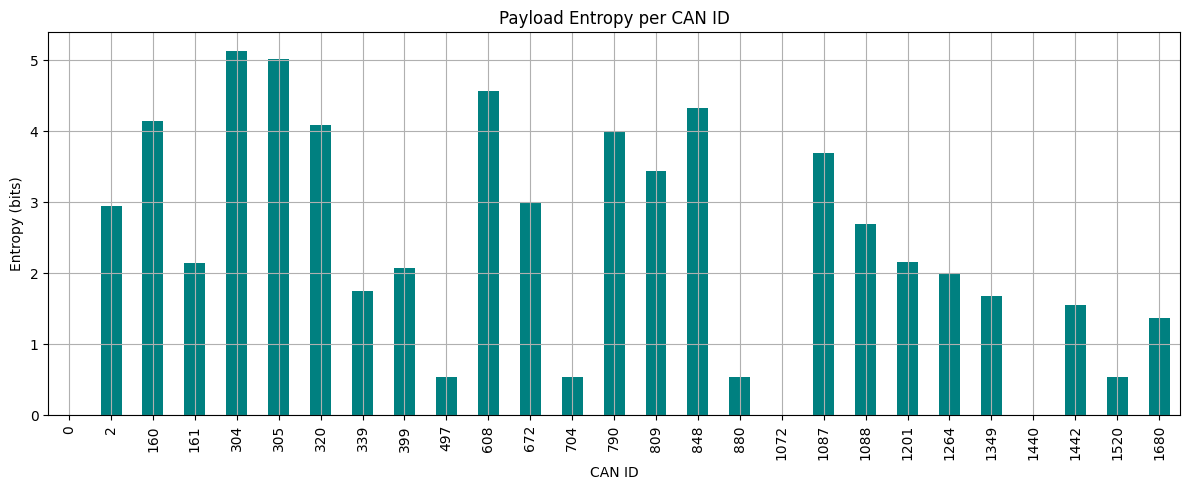

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# === Create Payload column ===
payload_cols = [f'data{i}' for i in range(1, 9)]
df['Payload'] = df[payload_cols].values.tolist()

# === Helper: Entropy function ===
def calculate_entropy(byte_stream):
    counts = np.bincount(byte_stream, minlength=256)
    probs = counts / len(byte_stream)
    probs = probs[probs > 0]
    return -np.sum(probs * np.log2(probs))

# === Group by CAN_ID and compute entropy ===
canid_entropy = {}

for can_id, group in df.groupby('CAN_ID'):
    # Flatten all payloads into one stream of bytes
    all_bytes = [byte for payload in group['Payload'] for byte in payload]
    entropy = calculate_entropy(all_bytes)
    canid_entropy[can_id] = entropy

# === Plot entropy per CAN_ID ===
entropy_series = pd.Series(canid_entropy).sort_index()
entropy_series.plot(kind='bar', figsize=(12, 5), color='teal')
plt.title('Payload Entropy per CAN ID')
plt.xlabel('CAN ID')
plt.ylabel('Entropy (bits)')
plt.grid(True)
plt.tight_layout()
plt.show()
